In [56]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

### Compute some statistics about species data

In [57]:
## get species text length
speciesFiles = os.listdir("./final_data/species/")
binomialName = []
speciesKey = []
textLenght = []
for file in speciesFiles:
    with open("./final_data/species/" + file, "r") as fp:
        fileContent = json.load(fp)
        binomialName.append(fileContent["binomial_name"])
        speciesKey.append(fileContent["species_key"])
        textLenght.append(fileContent["text_length"])
species_data = pd.DataFrame(list(zip(speciesKey, binomialName, textLenght)),columns =["species_key", "binomial_name", "text_lenght"])

In [58]:
## get species taxonomy
df = pd.read_json("./processed_data/species_data.json", orient="records")
df = df.drop("scientific_name", axis=1).drop_duplicates()
species_data = df.join(species_data.set_index("species_key"), on="species_key", how="inner")
df = None

In [59]:
## get species number of occurences
df = pd.read_json("./processed_data/species_habitats_records.json", orient="records").drop_duplicates()
df = pd.DataFrame(df["species_key"].value_counts())
df.columns=["observations_count"]
species_data = species_data.join(df, on="species_key", how="inner")
df = None

In [60]:
species_data.head()

,kingdom,phylum,class,order,family,genus,species,species_key,binomial_name,text_lenght,observations_count
8,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Solidago,Solidago canadensis,5389029,Solidago canadensis,4796,1461
100522,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Robinia,Robinia pseudoacacia,5352251,Robinia pseudoacacia,23580,1294
133592,Plantae,Tracheophyta,Magnoliopsida,Asterales,Asteraceae,Erigeron,Erigeron annuus,3117449,Erigeron annuus,3823,1182
320430,Plantae,Tracheophyta,Magnoliopsida,Fabales,Fabaceae,Trifolium,Trifolium repens,5358748,Trifolium repens,14238,143
323989,Plantae,Tracheophyta,Magnoliopsida,Celastrales,Celastraceae,Euonymus,Euonymus europaeus,3169131,Euonymus europaeus,5787,118


In [61]:
## Overall text length and obsercations count distributions
species_data.describe()

,species_key,text_lenght,observations_count
count,5.198000e+03,5198.000000,5198.000000
mean,4.049562e+06,4366.070027,38.058484
std,2.255535e+06,7832.387447,82.797309
min,1.013335e+06,79.000000,1.000000
25%,2.494764e+06,780.000000,3.000000
50%,3.049742e+06,2217.000000,12.000000
75%,5.342410e+06,4540.750000,40.000000
max,1.215520e+07,184067.000000,2146.000000


In [62]:
## Number of documented species per kingdom
pd.DataFrame(species_data["kingdom"].value_counts())

,kingdom
Animalia,2300
Plantae,2140
Fungi,743
Chromista,7
Protozoa,5
Bacteria,3


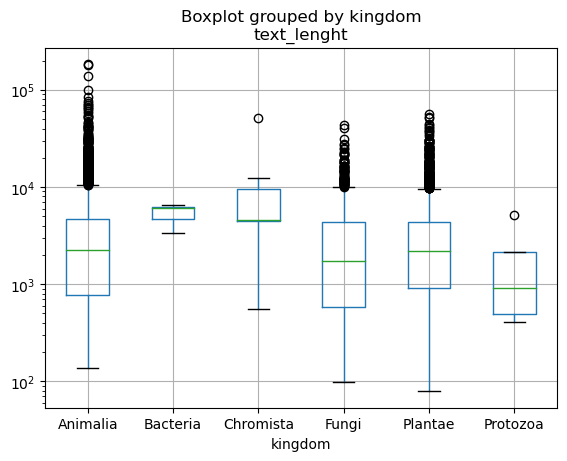

In [63]:
## Textlenght by kingom
ax = species_data.boxplot(column="text_lenght", by="kingdom")
ax.set_yscale("log")

In [64]:
## Total number of observations by kingdom
pd.DataFrame(species_data.groupby("kingdom")["observations_count"].sum())

,observations_count
kingdom,
Animalia,70459
Bacteria,3
Chromista,9
Fungi,5359
Plantae,121983
Protozoa,15


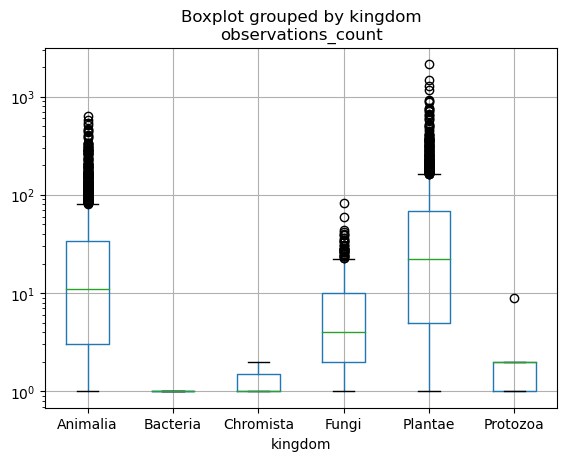

In [65]:
## Species number of observations distribution by kingdom
ax = species_data.boxplot(column="observations_count", by="kingdom")
ax.set_yscale("log")

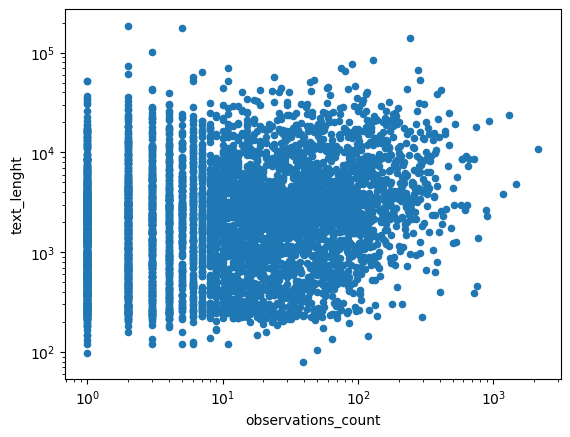

In [66]:
## Text length to observation count relation
ax = species_data.plot.scatter(x="observations_count", y="text_lenght")
ax.set_yscale("log")
ax.set_xscale("log")

### Compute statistics about inputs and targets

In [98]:
input_target_pairs = pd.read_json("./final_data/all_data.json", orient="records")
input_target_pairs.head(10)

,zone_id,maps_based_class,split,shape_area,species_key,species_count,species_based_class,num_classes
0,9,454,train,665918.930058,"[3032837, 3170807, 3105433, 2883073]",4,"[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",40
1,10,432,train,2991.243434,[4299368],1,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",50
2,13,664,train,230749.174683,[2891147],1,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...",61
3,26,433,train,400775.100939,"[5137582, 7799370]",2,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...",27
4,29,54,train,101384.855230,"[8207244, 5352367, 3170807]",3,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",40
5,37,435,train,10094.769110,[5405976],1,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...",57
6,38,663,train,132550.544072,[5410886],1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",39
7,61,431,train,46156.868586,"[7270427, 8152305, 2482553, 5231240, 2494422]",5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17
8,62,435,train,267678.647708,[5769191],1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
9,65,44,train,91369.895171,[8207244],1,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...",54


In [99]:
input_target_pairs.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zone_id,maps_based_class,shape_area,species_count,num_classes
count,25963.000000,25963.000000,2.596300e+04,25963.000000,25963.000000
mean,48656.067789,330.718022,1.386739e+05,3.762778,29.590456
std,27950.578900,275.021943,5.124324e+05,3.286255,17.251530
min,9.000000,2.000000,8.114492e+00,1.000000,1.000000
10%,10365.600000,11.000000,4.086319e+03,1.000000,6.000000
20%,21574.800000,41.000000,9.328835e+03,1.000000,12.000000
30%,26934.000000,66.000000,1.732712e+04,1.000000,18.000000
40%,36129.400000,92.000000,2.960359e+04,2.000000,24.000000
50%,49333.000000,424.000000,4.654735e+04,2.000000,30.000000
60%,59435.200000,451.000000,7.053005e+04,3.000000,35.000000


In [100]:
## Fraction of the area covered by the dataset
import geopandas as gpd
study_area = gpd.read_file("./raw_data/study_area/study_area.shp")
total_area = study_area.area[0]
dataset_area = input_target_pairs["shape_area"].sum()
dataset_area
difference = total_area-dataset_area
fraction = dataset_area/total_area
fraction
print(f"Precentage of zones covered with observations : {fraction:.2%}")

Precentage of zones covered with observations : 61.44%


Text(0, 0.5, 'Number of occurences')

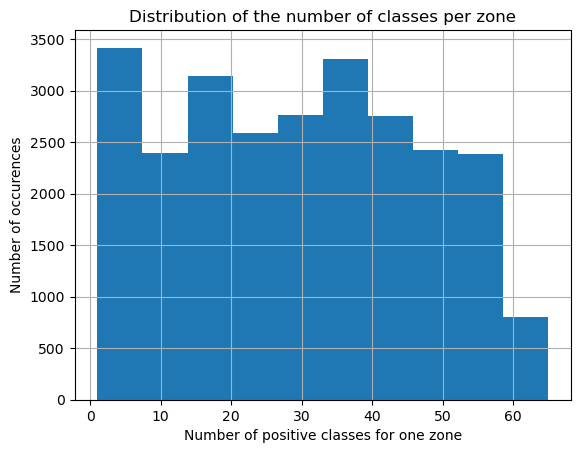

In [101]:
## Disribution of number of classes
plt.figure()
input_target_pairs["num_classes"].hist(bins=10)
plt.title("Distribution of the number of classes per zone")
plt.xlabel("Number of positive classes for one zone")
plt.ylabel("Number of occurences")

In [102]:
## Relationship between number of species and number of classes
corr = input_target_pairs["species_count"].corr(input_target_pairs["num_classes"])
print(f"The correlation between the number of species and the number of classes for a given zone is : {corr:.2%}")

The correlation between the number of species and the number of classes for a given zone is : -71.30%


In [106]:
## Occurence rate of classes accross samples
import torch
contingency = torch.tensor(input_target_pairs["species_based_class"].tolist())
occurence_rates = pd.DataFrame()
occurence_rates["class"] = pd.read_json("./final_data/habitats_keys.json", orient="records")["class"]
occurence_rates["rate"] = contingency.sum(dim=0).div(contingency.size(0)).tolist()
pd.DataFrame(occurence_rates.set_index("class").describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

,rate
count,84.000000
mean,0.352267
std,0.256033
min,0.004083
10%,0.040924
20%,0.081639
30%,0.148939
40%,0.240789
50%,0.339098
60%,0.404160


In [88]:
## Splits relative size
input_target_pairs["split"].value_counts()

train    15504
test      7934
val       2525
Name: split, dtype: int64

In [ ]:
## Available text lenght per zone and unique species number
subset = species_data[["speciesKey", "textLenght"]].set_index("speciesKey")
zones = input_target_pairs.drop_duplicates().join(subset, on="speciesKey", how="inner")
zones = zones.groupby(["zoneID","TypoCH_NUM","shapeArea","canton"]).agg({"speciesKey":"count","textLenght":"sum"}).reset_index()
zones = zones.rename(columns={"speciesKey":"speciesCount"})
zones.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,zoneID,TypoCH_NUM,shapeArea,speciesCount,textLenght
count,22787.000000,22787.000000,2.278700e+04,22787.000000,2.278700e+04
mean,48494.031290,442.163602,1.314472e+05,8.899592,5.714573e+04
std,28218.470841,732.487229,2.183925e+06,68.208714,3.311801e+05
min,9.000000,2.000000,8.114492e+00,1.000000,1.050000e+02
10%,9658.600000,12.000000,3.617861e+03,1.000000,2.126000e+03
20%,21022.200000,41.000000,8.015701e+03,1.000000,3.501000e+03
30%,26733.800000,66.000000,1.453556e+04,1.000000,5.631000e+03
40%,35618.200000,94.000000,2.454930e+04,1.000000,8.656400e+03
50%,48877.000000,432.000000,3.869770e+04,2.000000,1.244000e+04
60%,59375.800000,452.000000,5.890358e+04,3.000000,1.827480e+04


In [ ]:
## Number of occurence of habitats
habitatsData = pd.read_json("./WikiSpeciesHabitats/habitatsData.json", orient="records")
subset = pd.DataFrame(zones.TypoCH_NUM.value_counts())
subset.columns = ["occurencesCount"]
habitatsData = habitatsData.join(subset, on="TypoCH_NUM", how="left")
habitatsData = habitatsData.fillna(0)
habitatsData.head(10)

,TypoCH_NUM,TypoCH_DE,TypoCH_FR,TypoCH_IT,TypoCH_Sci,Class,Group_,Type,Source,occurencesCount
0,1,1 Gewässer,1 Eaux libres,1 Ambienti acquatici,0,1,1,1,1,0.0
1,11,1.1 Stehende Gewässer,1.1 Eaux calmes,1.1 Acque ferme,0,1,11,11,1,168.0
2,12,1.2 Fliessgewässer,1.2 Eaux courantes,1.2 Acque correnti,0,1,12,12,1,488.0
3,2,2 Ufer und der Feuchtgebiete,2 Rivages et lieux humides,2 Rive e luoghi umidi,0,2,2,2,1,21.0
4,21,2.1 Ufer mit Vegetation,2.1 Rivages avec végétation,2.1 Rive con copertura vegetale,0,2,21,21,1,132.0
5,211,2.1.1 Moortümpelgesellschaft,2.1.1 Dépression inondée à utriculaires,2.1.1 Depressioni allagate con Erba-vescica,Sphagno-Utricularion,2,21,211,1,0.0
6,212,2.1.2 Röhricht,2.1.2 Roselière,2.1.2 Canneti,0,2,21,212,2,0.0
7,2121,2.1.2.1 Stillwasser-Röhricht,2.1.2.1 Roselière lacustre,2.1.2.1 Canneti lacustri,Phragmition,2,21,212,2,0.0
8,2122,2.1.2.2 Flussufer- und Landröhricht,2.1.2.2 Roselière terrestre,"2.1.2.2 Canneti terrestri, ripariali",Phalaridion,2,21,212,2,17.0
9,22,2.2 Flachmoore,2.2 Bas-marais,2.2 Paludi (torbiere basse),0,2,22,22,2,0.0


In [ ]:
## At the TypoCH_NUM level
habitatsData.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,TypoCH_NUM,Class,Group_,Type,Source,occurencesCount
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,557.794872,5.153846,51.474359,400.128205,3.724359,146.070513
std,888.226669,2.188397,23.863712,293.086483,2.948097,255.823531
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10%,28.000000,2.000000,21.500000,28.000000,1.000000,0.000000
20%,60.000000,3.000000,25.000000,60.000000,2.000000,0.000000
30%,211.500000,4.000000,42.000000,152.500000,2.000000,0.000000
40%,401.000000,5.000000,45.000000,250.000000,2.000000,0.000000
50%,451.500000,5.000000,53.000000,432.500000,3.000000,6.000000
60%,543.000000,6.000000,61.000000,535.000000,3.000000,33.000000


In [ ]:
## At the Type level
pd.DataFrame(habitatsData.groupby("Type")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Type,occurencesCount
count,148.000000,148.000000
mean,403.297297,153.966216
std,296.006997,260.352467
min,1.000000,0.000000
10%,24.700000,0.000000
20%,53.400000,0.000000
30%,93.100000,0.000000
40%,251.800000,0.000000
50%,434.500000,13.500000
60%,537.200000,61.800000


In [ ]:
## At the Group level
pd.DataFrame(habitatsData.groupby("Group_")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Group_,occurencesCount
count,46.000000,46.000000
mean,42.195652,495.369565
std,27.922607,647.776826
min,1.000000,0.000000
10%,5.500000,0.000000
20%,11.000000,10.000000
30%,23.500000,44.500000
40%,33.000000,200.000000
50%,42.500000,278.000000
60%,51.000000,403.000000


In [ ]:
## At the Class level
pd.DataFrame(habitatsData.groupby("Class")["occurencesCount"].sum()).reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Class,occurencesCount
count,9.000000,9.000000
mean,5.000000,2531.888889
std,2.738613,2664.027001
min,1.000000,485.000000
10%,1.800000,621.800000
20%,2.600000,777.800000
30%,3.400000,880.200000
40%,4.200000,1017.800000
50%,5.000000,1441.000000
60%,5.800000,1997.800000


### See how species distribution differ in different habitats